In [1]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import pandas as pd
import time

# Retrieve the data from CSVs

In [2]:
X_train = pd.read_csv('data/X_train.csv')
Y_train = pd.read_csv('data/Y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
Y_test = pd.read_csv('data/Y_test.csv')

X_train_small = pd.read_csv('data/X_train_small.csv')
Y_train_small = pd.read_csv('data/Y_train_small.csv')
X_test_small = pd.read_csv('data/X_test_small.csv')
Y_test_small = pd.read_csv('data/Y_test_small.csv')

# SVM Classifier using RBF kernel
## Parameter Tuning 
using GridSearchCV function and 10-fold cross validation

In [3]:
properties = {
    'C': [0.01, 0.05, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
}

SVM = SVC(kernel='rbf')
GSCV = GridSearchCV(SVM, properties, cv=10, scoring='accuracy', n_jobs=-1, verbose=3)
GSCV.fit(X_train_small, Y_train_small.values.ravel())

print ("Best Score: ", GSCV.best_score_)
print ("Best Parameters: ", GSCV.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Score:  0.9746500000000001
Best Parameters:  {'C': 100, 'gamma': 'scale'}


In [4]:
best_model = GSCV.best_estimator_
results = GSCV.cv_results_

results_df = pd.DataFrame(results)
results_df = results_df[['param_C', 'param_gamma', 'mean_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by=['mean_test_score'], ascending=False)
results_df

,param_C,param_gamma,mean_test_score,rank_test_score
25,100,scale,0.97465,1
20,10,scale,0.97460,2
27,100,0.01,0.97225,3
22,10,0.01,0.97225,4
15,1,scale,0.96750,5
17,1,0.01,0.96370,6
26,100,auto,0.95435,7
21,10,auto,0.94665,8
10,0.1,scale,0.94120,9
12,0.1,0.01,0.93535,10


## Train the best model

In [5]:
start_time = time.time()
best_model.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")

Execution time: 161.52917 seconds


## Test the best model

In [6]:
start_time = time.time()
Y_test_pred = best_model.predict(X_test)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test, y_pred=Y_test_pred)))

Execution time: 45.61877 seconds
Accuracy: 0.984


## Confusion Matrix

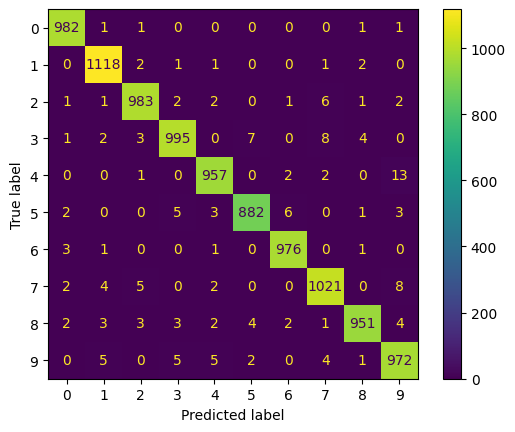

In [7]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)